> This is one of the 100 recipes of the [IPython Cookbook](http://ipython-books.github.io/), the definitive guide to high-performance scientific computing and data science in Python.


# 7.4. Estimating the correlation between two variables with a contingency table and a chi-square test

You need to download the *Tennis* dataset on the book's website, and extract it in the current directory. (http://ipython-books.github.io)

1. Let's import NumPy, Pandas, SciPy.stats and matplotlib.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

2. We load the dataset corresponding to Roger Federer.

In [2]:
player = 'Roger Federer'
filename = "data/{name}.csv".format(
              name=player.replace(' ', '-'))
df = pd.read_csv(filename)

3. This is a particularly rich dataset. Each row corresponds to a match, and the 70 columns contain many player characteristics during that match.

In [3]:
print("Number of columns: " + str(len(df.columns)))
df[df.columns[:4]].tail()

Number of columns: 70


,year,tournament,start date,type
1174,2012,"Australian Open, Australia",16.01.2012,GS
1175,2012,"Doha, Qatar",02.01.2012,250
1176,2012,"Doha, Qatar",02.01.2012,250
1177,2012,"Doha, Qatar",02.01.2012,250
1178,2012,"Doha, Qatar",02.01.2012,250


4. Here, we only look at the proportion of points won, and the (relative) number of aces.

In [4]:
npoints = df['player1 total points total']
points = df['player1 total points won'] / npoints
aces = df['player1 aces'] / npoints

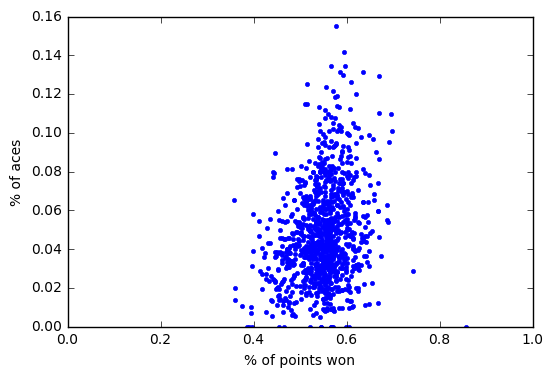

In [5]:
plt.plot(points, aces, '.');
plt.xlabel('% of points won');
plt.ylabel('% of aces');
plt.xlim(0., 1.);
plt.ylim(0.);

If the two variables were independent, we would not see any trend in the cloud of points. On this plot, it is a bit hard to tell. Let's use Pandas to compute a coefficient correlation.

5. We create a new `DataFrame` with only those fields (note that this step is not compulsory). We also remove the rows where one field is missing.

In [6]:
df_bis = pd.DataFrame({'points': points,
                       'aces': aces}).dropna()
df_bis.tail()

,aces,points
1173,0.024390,0.585366
1174,0.039855,0.471014
1175,0.046512,0.639535
1176,0.020202,0.606061
1177,0.069364,0.531792


6. Let's compute the Pearson's correlation coefficient between the relative number of aces in the match, and the number of points won.

In [7]:
df_bis.corr()

,aces,points
aces,1.000000,0.255457
points,0.255457,1.000000


A correlation of ~0.26 seems to indicate a positive correlation between our two variables. In other words, the more aces in a match, the more points the player wins (which is not very surprising!).

7. Now, to determine if there is a *statistically significant* correlation between the variables, we use a **chi-square test of independence of variables in a contingency table**.
8. First, we need to get binary variables (here, whether the number of points won or the number of aces is greater than their medians). For example, the value corresponding to the number of aces is True if the player is doing more aces than usual in a match, and False otherwise.

In [8]:
df_bis['result'] = df_bis['points'] > df_bis['points'].median()
df_bis['manyaces'] = df_bis['aces'] > df_bis['aces'].median()

9. Then, we create a **contingency table**, with the frequencies of all four possibilities (True & True, True & False, etc.).

In [9]:
pd.crosstab(df_bis['result'], df_bis['manyaces'])

manyaces,False,True
result,,
False,300,214
True,214,299


10. Finally, we compute the chi-square test statistic and the associated p-value. The null hypothesis is the independence between the variables. SciPy implements this test in `scipy.stats.chi2_contingency`, which returns several objects. We're interested in the second result, which is the p-value.

In [10]:
st.chi2_contingency(_)

(27.809858855369555,
 1.3384233799633629e-07,
 1,
 array([[ 257.25024343,  256.74975657],
        [ 256.74975657,  256.25024343]]))

The p-value is much lower than 0.05, so we reject the null hypothesis and conclude that there is a statistically significant correlation between the proportion of aces and the proportion of points won in a match (for Roger Federer!).

As always, correlation does not imply causation... Here, it is likely that external factors influence both variables. (http://en.wikipedia.org/wiki/Correlation_does_not_imply_causation)

> You'll find all the explanations, figures, references, and much more in the book (to be released later this summer).

> [IPython Cookbook](http://ipython-books.github.io/), by [Cyrille Rossant](http://cyrille.rossant.net), Packt Publishing, 2014 (500 pages).